# Visualise harmonic oscillator with Verlet integrator for different timesteps

In [ ]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt
from Code.dynamical_system import *
from Code.time_integrator import *

##Define parameters for the harmonic oscillator

In [ ]:
np.random.seed(2512517)
mass = 1.2
k_spring = 0.9
dt = 2
T_final = 100
harmonic_oscillator = HarmonicOscillator(mass,k_spring)
verlet_integrator = VerletIntegrator(harmonic_oscillator,dt)
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.0
v[0] = 0.0

##Integrate forwards using the Verlet integrator

In [ ]:
n_step = int(T_final/dt)
energies = np.zeros((1,n_step))
x_phase = np.zeros((1,n_step))
v_phase = np.zeros((1,n_step))

integrator = verlet_integrator
integrator.set_state(x,v)
for k in range(n_step):
    energies[0,k] = harmonic_oscillator.energy(integrator.x,integrator.v)
    x_phase[0,k] = integrator.x[0]
    v_phase[0,k] = integrator.v[0]
    integrator.integrate(1)    

## Plot phase space diagram and energy drift

<Figure size 1440x576 with 0 Axes>

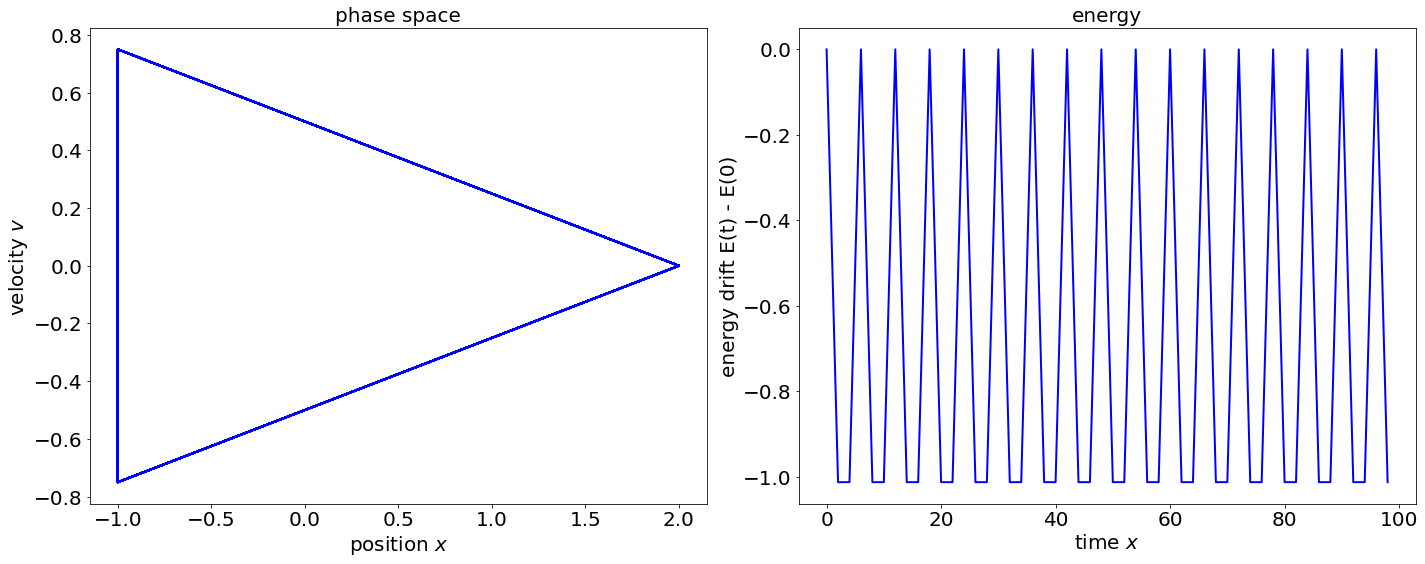

In [ ]:
plt.clf()
figs, axs = plt.subplots(1,2)
X = dt*np.arange(n_step)
axs[0].plot(x_phase[0,:],v_phase[0,:],linewidth=2,color='blue')
axs[0].set_title('phase space')
axs[0].set_xlabel('position $x$')
axs[0].set_ylabel('velocity $v$')
#axs[0].set_xlim(0.8,2.2)
axs[1].plot(X,energies[0,:]-energies[0,0],linewidth=2,color='blue')
axs[1].set_title('energy')
axs[1].set_xlabel('time $x$')
axs[1].set_ylabel('energy drift E(t) - E(0)')
#axs[1].set_ylim(-0.0001,0.0001)

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.tight_layout()
plt.rcParams['figure.figsize'] = [20, 8]